<a href="https://colab.research.google.com/github/ysc4/CCMACLRL_EXERCISES_COM222-ML/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 9: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all classification models

Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e10/overview



In [ ]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Dataset File

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/train.csv?raw=true'
df = pd.read_csv(dataset_url)

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


## Sample Submission File

In [ ]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39098 non-null  int64  
 1   loan_status  39098 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 611.0 KB


# Data Preprocessing

In [ ]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,50295
1,8350


In [ ]:
df.drop('id', axis=1, inplace=True)
dt.drop('id', axis=1, inplace=True)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('loan_status')
categorical_features = df.select_dtypes(include=['object']).columns
print(numerical_features)
print(categorical_features)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


## Data Visualization

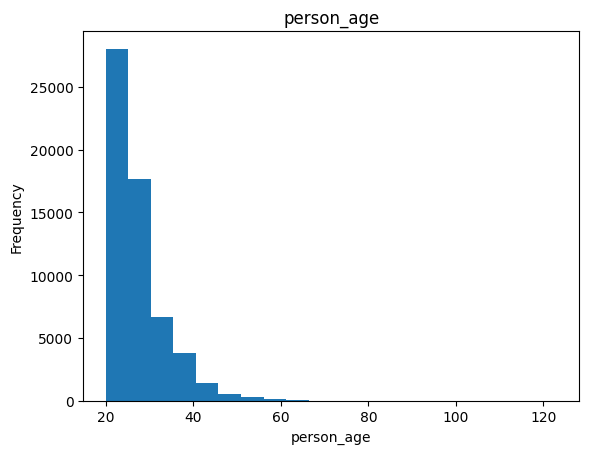

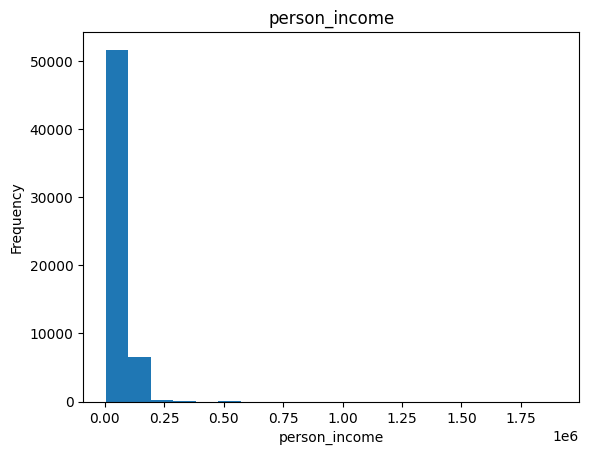

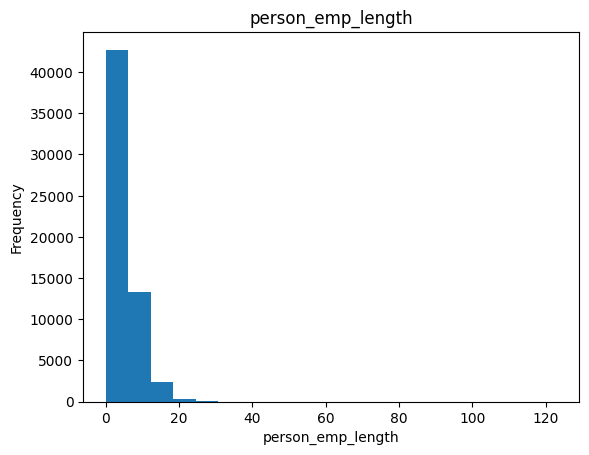

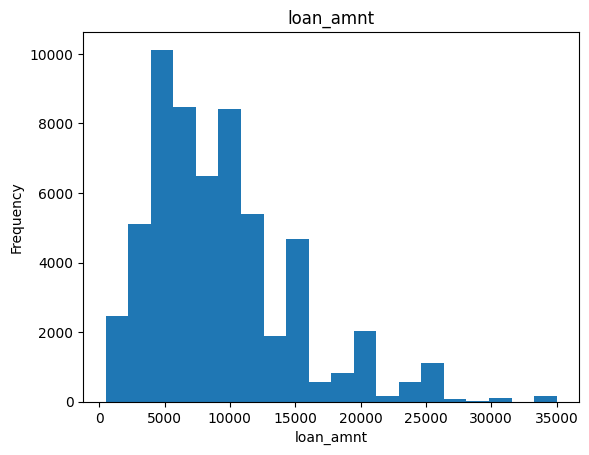

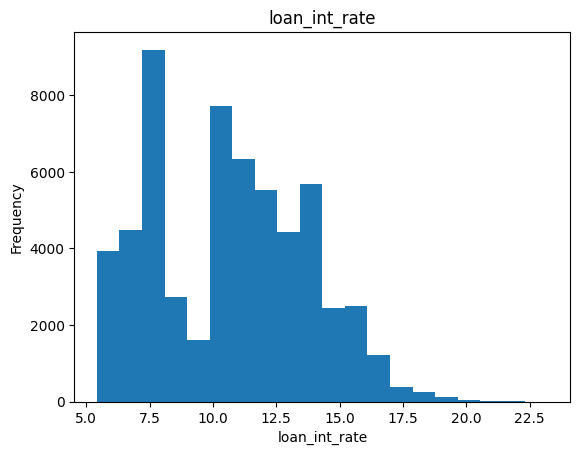

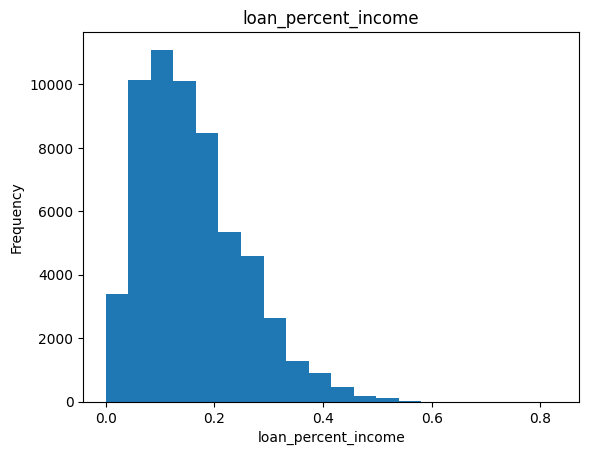

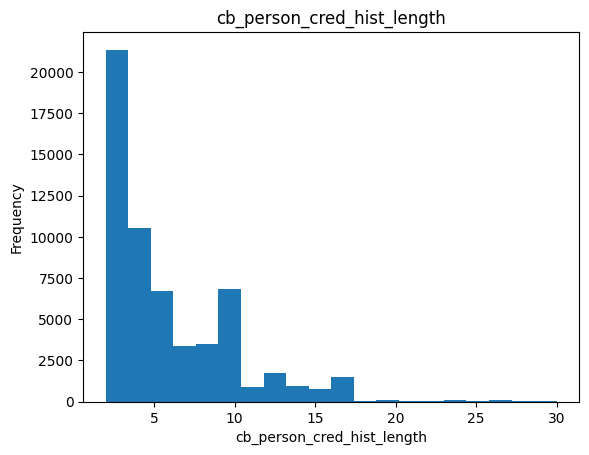

In [ ]:
for label in numerical_features:
    plt.hist(df[label], bins=20)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(label)
    plt.show()

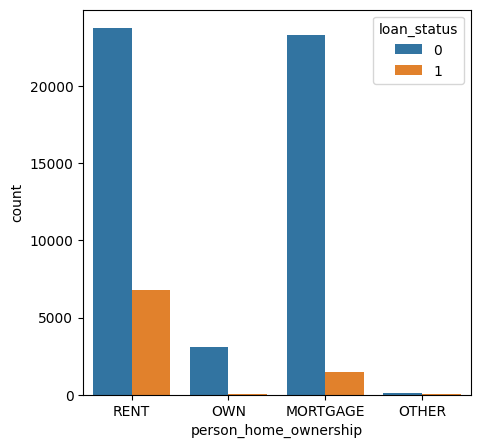

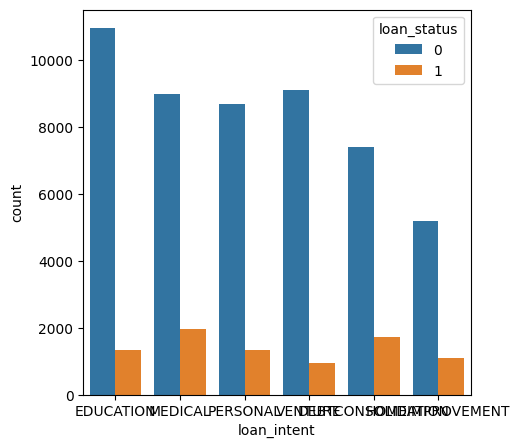

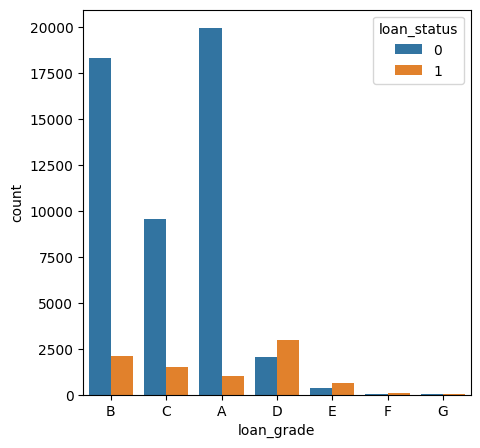

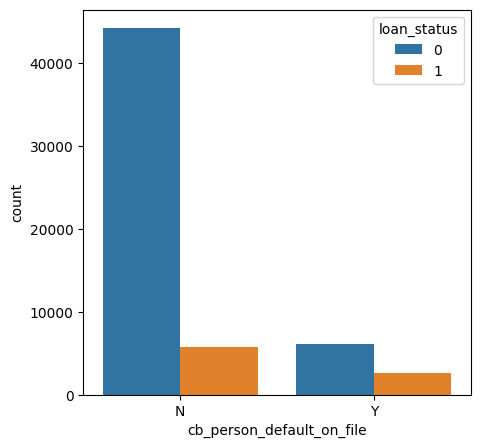

In [ ]:
for label in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=label, hue='loan_status')

In [ ]:
for col in categorical_features:
    print(f"{col} : {df[col].unique()}")

person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent : ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade : ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file : ['N' 'Y']


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## Feature Engineering

In [ ]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'cb_person_default_on_file'], drop_first=True)
dt = pd.get_dummies(dt, columns=['person_home_ownership', 'cb_person_default_on_file'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['loan_intent'] = le.fit_transform(df['loan_intent'])
dt['loan_intent'] = le.transform(dt['loan_intent'])

In [ ]:
loan_grade_mapping = {
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
}

df['loan_grade'] = df['loan_grade'].map(loan_grade_mapping)
dt['loan_grade'] = dt['loan_grade'].map(loan_grade_mapping)

## Data Treatment 1 : Standard Scaling w/o New Features

In [ ]:
from sklearn.preprocessing import StandardScaler

df_1 = df.copy()
dt_1 = dt.copy()
scaler = StandardScaler()
df_1[numerical_features] = scaler.fit_transform(df[numerical_features])
dt_1[numerical_features] = scaler.transform(dt[numerical_features])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   58645 non-null  float64
 1   person_income                58645 non-null  float64
 2   person_emp_length            58645 non-null  float64
 3   loan_intent                  58645 non-null  int64  
 4   loan_grade                   58645 non-null  int64  
 5   loan_amnt                    58645 non-null  float64
 6   loan_int_rate                58645 non-null  float64
 7   loan_percent_income          58645 non-null  float64
 8   cb_person_cred_hist_length   58645 non-null  float64
 9   loan_status                  58645 non-null  int64  
 10  person_home_ownership_OTHER  58645 non-null  bool   
 11  person_home_ownership_OWN    58645 non-null  bool   
 12  person_home_ownership_RENT   58645 non-null  bool   
 13  cb_person_defaul

## Data Treatment 2 : Standard Scaling + Log Transformation w/o New Features

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

df_2 = df_1.copy()
df_2['log_loan_percent_income'] = np.log1p(df['loan_percent_income'])
df_2['log_person_income'] = np.log1p(df['person_income'])
df_2['log_loan_amnt'] = np.log1p(df['loan_amnt'])

dt_1['log_loan_percent_income'] = np.log1p(dt['loan_percent_income'])
dt_1['log_person_income'] = np.log1p(dt['person_income'])
dt_1['log_loan_amnt'] = np.log1p(dt['loan_amnt'])

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   58645 non-null  float64
 1   person_income                58645 non-null  float64
 2   person_emp_length            58645 non-null  float64
 3   loan_intent                  58645 non-null  int64  
 4   loan_grade                   58645 non-null  int64  
 5   loan_amnt                    58645 non-null  float64
 6   loan_int_rate                58645 non-null  float64
 7   loan_percent_income          58645 non-null  float64
 8   cb_person_cred_hist_length   58645 non-null  float64
 9   loan_status                  58645 non-null  int64  
 10  person_home_ownership_OTHER  58645 non-null  bool   
 11  person_home_ownership_OWN    58645 non-null  bool   
 12  person_home_ownership_RENT   58645 non-null  bool   
 13  cb_person_defaul

## Data Treatment 3: Standard Scaling w/ New Features

In [ ]:
df_3 = df_1.copy()

In [ ]:
df_3['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df_3['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
df_3['interest_to_income_ratio'] = (df['loan_amnt'] * df['loan_int_rate']) / df['person_income']
df_3['loan_amnt_x_loan_int_rate'] = df['loan_amnt'] * df['loan_int_rate']
df_3['income_x_grade'] = df['person_income'] * df['loan_grade']

In [ ]:
new_scaled = ['debt_to_income_ratio', 'cred_hist_to_age_ratio', 'interest_to_income_ratio', 'loan_amnt_x_loan_int_rate', 'income_x_grade']

In [ ]:
df_3[new_scaled] = scaler.fit_transform(df_3[new_scaled])

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   58645 non-null  float64
 1   person_income                58645 non-null  float64
 2   person_emp_length            58645 non-null  float64
 3   loan_intent                  58645 non-null  int64  
 4   loan_grade                   58645 non-null  int64  
 5   loan_amnt                    58645 non-null  float64
 6   loan_int_rate                58645 non-null  float64
 7   loan_percent_income          58645 non-null  float64
 8   cb_person_cred_hist_length   58645 non-null  float64
 9   loan_status                  58645 non-null  int64  
 10  person_home_ownership_OTHER  58645 non-null  bool   
 11  person_home_ownership_OWN    58645 non-null  bool   
 12  person_home_ownership_RENT   58645 non-null  bool   
 13  cb_person_defaul

## Data Treatment 4 : Standard Scaling + Log Transformation w/ New Features

In [ ]:
df_4 = df_2.copy()

In [ ]:
df_4['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df_4['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
df_4['interest_to_income_ratio'] = (df['loan_amnt'] * df['loan_int_rate']) / df['person_income']
df_4['loan_amnt_x_loan_int_rate'] = df['loan_amnt'] * df['loan_int_rate']
df_4['income_x_grade'] = df['person_income'] * df['loan_grade']

dt_1['debt_to_income_ratio'] = dt['loan_amnt'] / dt['person_income']
dt_1['cred_hist_to_age_ratio'] = dt['cb_person_cred_hist_length'] / dt['person_age']
dt_1['interest_to_income_ratio'] = (dt['loan_amnt'] * dt['loan_int_rate']) / dt['person_income']
dt_1['loan_amnt_x_loan_int_rate'] = dt['loan_amnt'] * dt['loan_int_rate']
dt_1['income_x_grade'] = dt['person_income'] * dt['loan_grade']

In [ ]:
df_4['log_debt_to_income_ratio'] = np.log1p(df_4['debt_to_income_ratio'])
df_4['log_cred_hist_to_age_ratio'] = np.log1p(df_4['cred_hist_to_age_ratio'])
df_4['log_interest_to_income_ratio'] = np.log1p(df_4['interest_to_income_ratio'])
df_4['log_loan_amnt_x_loan_int_rate'] = np.log1p(df_4['loan_amnt_x_loan_int_rate'])
df_4['log_income_x_grade'] = np.log1p(df_4['income_x_grade'])

dt_1['log_debt_to_income_ratio'] = np.log1p(dt_1['debt_to_income_ratio'])
dt_1['log_cred_hist_to_age_ratio'] = np.log1p(dt_1['cred_hist_to_age_ratio'])
dt_1['log_interest_to_income_ratio'] = np.log1p(dt_1['interest_to_income_ratio'])
dt_1['log_loan_amnt_x_loan_int_rate'] = np.log1p(dt_1['loan_amnt_x_loan_int_rate'])
dt_1['log_income_x_grade'] = np.log1p(dt_1['income_x_grade'])

In [ ]:
df_4[new_scaled] = scaler.fit_transform(df_4[new_scaled])
dt_1[new_scaled] = scaler.transform(dt_1[new_scaled])

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     58645 non-null  float64
 1   person_income                  58645 non-null  float64
 2   person_emp_length              58645 non-null  float64
 3   loan_intent                    58645 non-null  int64  
 4   loan_grade                     58645 non-null  int64  
 5   loan_amnt                      58645 non-null  float64
 6   loan_int_rate                  58645 non-null  float64
 7   loan_percent_income            58645 non-null  float64
 8   cb_person_cred_hist_length     58645 non-null  float64
 9   loan_status                    58645 non-null  int64  
 10  person_home_ownership_OTHER    58645 non-null  bool   
 11  person_home_ownership_OWN      58645 non-null  bool   
 12  person_home_ownership_RENT     58645 non-null 

In [ ]:
dt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     39098 non-null  float64
 1   person_income                  39098 non-null  float64
 2   person_emp_length              39098 non-null  float64
 3   loan_intent                    39098 non-null  int64  
 4   loan_grade                     39098 non-null  int64  
 5   loan_amnt                      39098 non-null  float64
 6   loan_int_rate                  39098 non-null  float64
 7   loan_percent_income            39098 non-null  float64
 8   cb_person_cred_hist_length     39098 non-null  float64
 9   person_home_ownership_OTHER    39098 non-null  bool   
 10  person_home_ownership_OWN      39098 non-null  bool   
 11  person_home_ownership_RENT     39098 non-null  bool   
 12  cb_person_default_on_file_Y    39098 non-null 

In [ ]:
X = df_4.drop('loan_status', axis=1)
y = df_4['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46916, 26) (11729, 26) (46916,) (11729,)


In [ ]:
model_scores = {}

## 1. Train a KNN Classifier

In [ ]:
# put your answer here
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

'''score = []
k_range = list(range(1, 100))
best_k = 0
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) # Train Model

  y_pred = knn_model.predict(X_test) # Predict labels for test set
  if knn_model.score(X_test, y_test) > best_score:
    best_score = knn_model.score(X_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(X_test, y_test))
'''
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10087
           1       0.84      0.61      0.70      1642

    accuracy                           0.93     11729
   macro avg       0.89      0.79      0.83     11729
weighted avg       0.92      0.93      0.92     11729

[[9893  194]
 [ 643  999]]


- Perform cross validation

In [ ]:
# put your answer here
knn_score = cross_val_score(knn_model, X, y, cv=5)
print(knn_score)
print(knn_score.mean())
print(knn_score.std())

[0.9241197  0.92582488 0.92667747 0.92676272 0.92753005]
0.9261829652996845
0.0011645235623813776


In [ ]:
model_scores['knn'] = knn_score.mean()

## 2. Train a Logistic Regression Classifier

In [ ]:
# put your answer here
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

'''# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Depending on the penalty type
    'max_iter': [100, 200, 300]
}
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100]
}
# Initialize Logistic Regression classifier
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)'''
lr = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9103930428851564
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10087
           1       0.78      0.50      0.61      1642

    accuracy                           0.91     11729
   macro avg       0.85      0.74      0.78     11729
weighted avg       0.90      0.91      0.90     11729

[[9855  232]
 [ 819  823]]


- Perform cross validation

In [ ]:
# put your answer here
lr_score = cross_val_score(lr, X, y, cv=5)
print(lr_score)
print(lr_score.mean())
print(lr_score.std())

[0.90817632 0.90561855 0.90962571 0.90979623 0.9090289 ]
0.9084491431494586
0.0015245830299092673


In [ ]:
model_scores['lr'] = lr_score.mean()

## 3. Train a Naive Bayes Classifier

In [ ]:
# put your answer here
# Define the parameter grid for Naive Bayes (Gaussian)

nb = GaussianNB(var_smoothing=1e-09)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8145621962656663
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10087
           1       0.41      0.75      0.53      1642

    accuracy                           0.81     11729
   macro avg       0.68      0.79      0.71     11729
weighted avg       0.88      0.81      0.84     11729

[[8317 1770]
 [ 405 1237]]


- Perform cross validation

In [ ]:
# put your answer here
nb_score = cross_val_score(nb, X, y, cv=5)
print(nb_score)
print(nb_score.mean())
print(nb_score.std())

[0.81865462 0.82215023 0.82300281 0.81865462 0.82027453]
0.8205473612413675
0.0017797651350521207


In [ ]:
model_scores['nb'] = nb_score.mean()

## 4. Train a SVM Classifier

In [ ]:
# put your answer here
'''param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Only applicable for poly kernel
}'''

'''param_grid = {
    'C': [0.1, 1, 10],  # Reasonable small set of regularization values
    'kernel': ['linear', 'rbf'],  # Limiting to linear and RBF as the most effective kernels
    'gamma': ['scale'],  # Use 'scale' as it's automatic and works well in most cases
}'''
svm = SVC(C = 100, gamma = 'scale', kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9258248785062665
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10087
           1       0.83      0.59      0.69      1642

    accuracy                           0.93     11729
   macro avg       0.88      0.78      0.82     11729
weighted avg       0.92      0.93      0.92     11729

[[9895  192]
 [ 678  964]]


- Perform cross validation

In [ ]:
# put your answer here
svm_score = cross_val_score(svm, X, y, cv=5)
print(svm_score)
print(svm_score.mean())
print(svm_score.std())

[0.92232927 0.9230966  0.92284082 0.92514281 0.92403444]
0.9234887884730156
0.0009951563789864588


In [ ]:
model_scores['svm'] = svm_score.mean()

## 5. Train a Decision Tree Classifier

In [ ]:
# put your answer here
'''param_grid = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}'''

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter='best')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9462869809872965
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.90      0.69      0.78      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.84      0.88     11729
weighted avg       0.94      0.95      0.94     11729

[[9965  122]
 [ 508 1134]]


- Perform cross validation

In [ ]:
# put your answer here
dt_score = cross_val_score(dt, X, y, cv=5)
print(dt_score)
print(dt_score.mean())
print(dt_score.std())

[0.94347344 0.94407025 0.94543439 0.9474806  0.94858897]
0.9458095319294056
0.001956572453221064


In [ ]:
model_scores['dt'] = dt_score.mean()

## 6. Train a Random Forest Classifier

In [ ]:
# put your answer here
'''param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}'''

'''param_grid = {
    'n_estimators': [100, 200],  # A reduced set of estimators
    'max_depth': [10, 20, None],  # Testing a couple of fixed depths and no limit
    'min_samples_split': [2, 5],  # Common options for splitting
    'min_samples_leaf': [1, 2],  # Reasonable leaf sizes
    'bootstrap': [True]  # Stick with bootstrap (most common)
}'''

"param_grid = {\n    'n_estimators': [100, 200],  # A reduced set of estimators\n    'max_depth': [10, 20, None],  # Testing a couple of fixed depths and no limit\n    'min_samples_split': [2, 5],  # Common options for splitting\n    'min_samples_leaf': [1, 2],  # Reasonable leaf sizes\n    'bootstrap': [True]  # Stick with bootstrap (most common)\n}"

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 5, bootstrap = True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9471395685906727
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.90      0.70      0.79      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.84      0.88     11729
weighted avg       0.95      0.95      0.94     11729

[[9957  130]
 [ 490 1152]]


In [ ]:
model_scores['rf'] = rf.score(X_test, y_test)

## 7. Compare all the performance of all classification models

In [ ]:
# put your answer here
sorted_scores = {k: v for k, v in sorted(model_scores.items(), key=lambda item: item[1], reverse=True)}
print(sorted_scores)

{'rf': 0.9471395685906727, 'dt': 0.9458095319294056, 'knn': 0.9261829652996845, 'svm': 0.9234887884730156, 'lr': 0.9084491431494586, 'nb': 0.8205473612413675}


## 9. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [ ]:
#id = sf.pop('id')
y_pred = rf.predict(dt_1)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'loan_status': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
